# Predicting gold enrichment efficiency

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-goal" data-toc-modified-id="Project-goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project goal</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Importing-data-and-libraries" data-toc-modified-id="Importing-data-and-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing data and libraries</a></span></li><li><span><a href="#Check-of-calculation-of-the-enrichment-efficiency" data-toc-modified-id="Check-of-calculation-of-the-enrichment-efficiency-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check of calculation of the enrichment efficiency</a></span></li><li><span><a href="#Features-not-available-in-the-test-sample" data-toc-modified-id="Features-not-available-in-the-test-sample-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Features not available in the test sample</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data preparation</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-at-different-stages-of-cleaning" data-toc-modified-id="Changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-at-different-stages-of-cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Changes in the concentration of metals (Au, Ag, Pb) at different stages of cleaning</a></span></li><li><span><a href="#Distribution-of-raw-material-granule-sizes-on-the-training-and-test-samples" data-toc-modified-id="Distribution-of-raw-material-granule-sizes-on-the-training-and-test-samples-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution of raw material granule sizes on the training and test samples</a></span></li><li><span><a href="#Total-concentration-of-all-substances-at-different-stages:-in-raw-materials,-in-rough-and-final-concentrates" data-toc-modified-id="Total-concentration-of-all-substances-at-different-stages:-in-raw-materials,-in-rough-and-final-concentrates-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Total concentration of all substances at different stages: in raw materials, in rough and final concentrates</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Function-for-calculating-the-total-sMAPE" data-toc-modified-id="Function-for-calculating-the-total-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Function for calculating the total sMAPE</a></span></li><li><span><a href="#Searching-for-an-optimal-model" data-toc-modified-id="Searching-for-an-optimal-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Searching for an optimal model</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></li><li><span><a href="#Testing-optimal-models-on-the-test-sample" data-toc-modified-id="Testing-optimal-models-on-the-test-sample-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Testing optimal models on the test sample</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Project goal

Prepare a prototype of the machine learning model. The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold-bearing ore. We'll use data with mining and cleaning parameters.

The model will help to optimize production, so as not to start a company with unprofitable characteristics.

We need to:

1. Prepare the data;
2. Conduct a research analysis of the data;
3. Build and train the model.

## Data Preparation

### Importing data and libraries

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [2]:
train=pd.read_csv('gold_recovery_train.csv')
test=pd.read_csv('gold_recovery_test.csv')
full=pd.read_csv('gold_recovery_full.csv')

In [3]:
display(train.head(3))
train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


The training sample has 87 columns, 16775 rows.

In [4]:
display(test.head(3))
test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

The test sample has 53 columns, 5840 rows.

In [5]:
display(full.head(3))
full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


There are 87 columns and 22615 rows in the full set.

###  Check of calculation of the enrichment efficiency

Let's calculate the enrichment efficiency on the training sample for the `rougher.output.recovery` attribute. We'll find the MAE between our calculations and the attribute value.

    C is the proportion of gold in the concentrate after flotation/cleaning;
    F is the proportion of gold in the raw material / concentrate before flotation/cleaning;
    T is the proportion of gold in the tailings after flotation/cleaning.

In [6]:
def recovery(c,f,t):
    recovery =  (c * (f - t)) / (f * (c - t)) * 100
    return recovery

Let's delete the lines with gaps in the columns needed for calculation:

In [7]:
train_temp=train.copy().dropna(subset= ['rougher.output.concentrate_au','rougher.input.feed_au', 'rougher.output.tail_au','rougher.output.recovery'])
train_temp['rougher.output.tail_au'].isna().sum()

0

Let's calculate the efficiency of enrichment using the formula on the data without gaps in the columns, then look at the average values of our results and the data in the table, and calculate the average absolute error.

In [8]:
train_temp['rougher.output.recovery.check']=recovery(train_temp['rougher.output.concentrate_au'],train_temp['rougher.input.feed_au'],train_temp['rougher.output.tail_au'])
print('Efficiency of enrichment in the full data set -- {:.3f}'.format(train_temp['rougher.output.recovery'].mean()))
print('Efficiency of enrichment by formula -- {:.3f}'.format(train_temp['rougher.output.recovery.check'].mean()))
print('Mean absolute error -- {:.1f}'.format(mean_absolute_error(train_temp['rougher.output.recovery'],train_temp['rougher.output.recovery.check'])))

Efficiency of enrichment in the full data set -- 82.394
Efficiency of enrichment by formula -- 82.394
Mean absolute error -- 0.0


We have made sure that the enrichment efficiency is calculated correctly. The efficiency of enrichment in the rough concentrate is 82.4

### Features not available in the test sample

Let's analyze the features that are not available in the test sample.

In [9]:
diff=list(set(train) - set(test))
unused_features=sorted(diff)
unused_features

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

The test set does not contain the final characteristics, as well as the product parameters and output tails after each processing stage. According to the task conditions, we know that some parameters are not available, because they are measured and / or calculated much later. Because of this, the test sample lacks some features that may be in the training sample. Also, there are no target features in the test set.

Since some features are not present in the test set, it is logical to remove them from the training sample. We can also take the target features for a test set from the full dataset.

First, we will remove the features that are not used in the test.

In [10]:
train=train.drop(unused_features, axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   primary_cleaner.input.sulfate               15553 non-null  float64
 2   primary_cleaner.input.depressant            15598 non-null  float64
 3   primary_cleaner.input.feed_size             16860 non-null  float64
 4   primary_cleaner.input.xanthate              15875 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      16822 non-null  float64
 10  primary_cl

Adding the target attributes `rougher.output.recovery` and `final.output.recovery` to the training and test sample.

In [11]:
test=test.set_index('date')
full=full.set_index('date')
train=train.set_index('date')

In [12]:
test=(test.join(full[['rougher.output.recovery', 'final.output.recovery']])).reset_index()
train=(train.join(full[['rougher.output.recovery', 'final.output.recovery']])).reset_index()

### Data preparation

Let's remove the rows where there is no data on the target attributes.

In [13]:
test=test.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'])
train=train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'])
display(test['rougher.output.recovery'].isna().sum())
display(test['final.output.recovery'].isna().sum())
display(train['rougher.output.recovery'].isna().sum())
display(train['final.output.recovery'].isna().sum())

0

0

0

0

Let's look at the distribution of the target attribute.

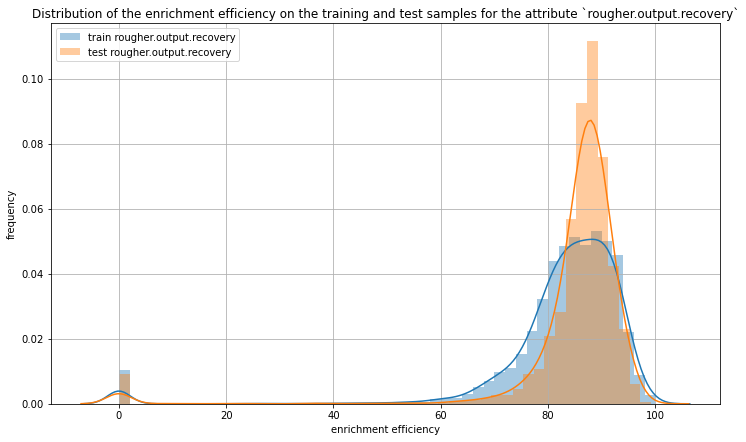

In [14]:
plt.figure(figsize=(12,7))
sns.distplot(train['rougher.output.recovery'], label='train rougher.output.recovery')
sns.distplot(test['rougher.output.recovery'], label='test rougher.output.recovery')
plt.title('Distribution of the enrichment efficiency on the training and test samples for the attribute `rougher.output.recovery`')
plt.legend()
plt.xlabel('enrichment efficiency')
plt.ylabel('frequency')
plt.grid()
plt.xlim
plt.show()

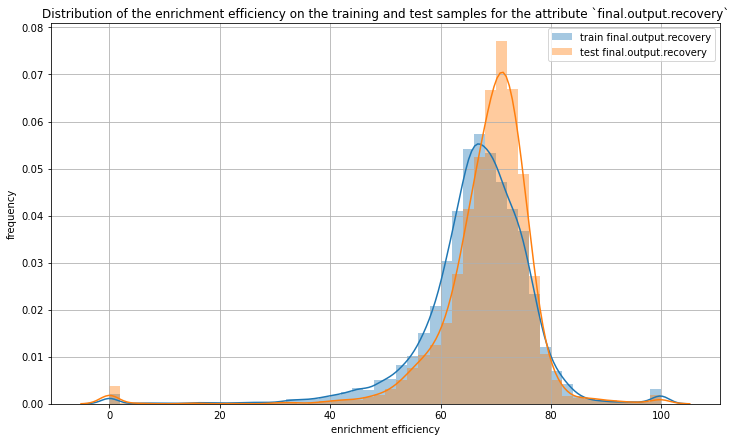

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(train['final.output.recovery'], label='train final.output.recovery')
sns.distplot(test['final.output.recovery'], label='test final.output.recovery')
plt.title('Distribution of the enrichment efficiency on the training and test samples for the attribute `final.output.recovery`')
plt.legend()
plt.xlabel('enrichment efficiency')
plt.ylabel('frequency')
plt.grid()
plt.xlim
plt.show()

Let's delete the rows in the training sample where `rougher.output.recovery` is null.

In [16]:
target_null=train[train['rougher.output.recovery']==0]
target_null.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
45,2016-01-16 21:00:00,131.251366,13.969457,7.25,1.203034,1601.674776,-500.285160,1600.151967,-499.633542,1599.542959,-499.495721,1599.342687,-500.360306,7.521974,2.811569,581.605260,65.620714,41.154430,7.114065,13.322740,7.504592,13.311361,7.493738,999.026619,-499.850895,1600.614880,-500.331775,1598.654561,-500.364377,1398.394100,-501.540155,1197.182011,-500.205806,1198.542180,-499.648335,25.963860,-498.097243,23.896954,-500.047419,24.963926,-500.207267,23.984937,-500.613261,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,0.0,68.403877
46,2016-01-16 22:00:00,141.184039,13.978607,7.25,1.248254,1604.852903,-500.922517,1603.005456,-499.631837,1599.307763,-501.200791,1599.437018,-499.307245,7.313187,2.973841,562.972841,66.014780,41.983063,7.651522,14.433889,7.583598,14.482716,7.578460,999.846655,-500.082738,1599.408126,-500.189249,1598.918123,-498.775979,1398.970429,-500.939255,1198.632079,-501.344435,1198.715369,-500.311765,25.946448,-502.052990,23.903017,-500.245612,25.029826,-499.896144,23.963950,-499.786821,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,0.0,70.675633
47,2016-01-16 23:00:00,126.397495,12.709727,7.25,1.229626,1601.301169,-498.725777,1605.370031,-500.644437,1598.360694,-500.461991,1604.014273,-501.824136,7.934791,1.763437,229.379445,40.601032,NaN,5.587750,10.865871,5.648950,10.786929,5.638302,1003.354806,-501.078303,1603.648910,-498.000810,1603.488420,-495.577057,1402.004381,-497.117094,1203.394353,-494.391170,1202.592202,-500.167701,26.069763,-502.180953,24.044256,-502.252420,25.024571,-499.417407,23.983086,-499.931140,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665,0.0,55.088448
48,2016-01-17 00:00:00,69.411904,7.443190,7.25,0.926251,1600.850721,-502.596676,1600.924370,-497.882595,1598.657904,-502.329247,1597.779240,-499.051485,7.756881,1.025762,228.510521,41.248945,11.816724,4.752992,5.908582,5.048482,5.893169,5.052284,998.548594,-500.170221,1

In [17]:
display(len(train))
target_exclude_list=target_null['date'].to_list()
train=train.query('date not in @target_exclude_list')
display(len(train))

14149

13852

Only 294 rows were deleted, 2% of the training sample.

Now let's work with the gaps in the training features. We know that the time-adjacent parameters are often similar, so we will take the values of the missing features from the previous time rows.

In [18]:
train=train.fillna(method='ffill')
test=test.fillna(method='ffill')
full=full.fillna(method='ffill')
train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Let's check the features for multicollinearity.

In [19]:
train.shape

(13852, 55)

In [20]:
correlated_features = set()
correlation_matrix = train.corr()
correlation_matrix.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
primary_cleaner.input.sulfate,1.000000,0.495628,0.167606,0.265051,0.035292,-0.015964,0.057015,-0.030075,0.055732,-0.002792,0.113851,-0.023495,0.544556,0.563043,0.311751,-0.075679,0.366606,0.611175,0.411325,0.385971,0.516906,0.418809,0.203776,0.081475,-0.232145,-0.224203,-0.258256,-0.226581,-0.297840,-0.225670,-0.265669,-0.230628,-0.243877,-0.231559,0.124290,0.102253,0.134042,0.122920,0.079242,-0.014665,0.002683,-0.044502,0.083583,0.030934,0.106693,-0.053715,-0.005992,-0.034920,-0.001165,-0.031715,-0.111553,-0.144348,0.434402,0.381654
primary_cleaner.input.depressant,0.495628,1.000000,0.173114,0.276863,-0.142791,0.141292,-0.105577,0.145805,-0.116459,0.161203,-0.093133,0.068665,0.480392,0.282844,0.164204,-0.076478,0.086067,0.424576,0.154533,0.385087,0.265463,0.428538,-0.029774,-0.266973,-0.112486,-0.318577,-0.143738,-0.316770,-0.131342,-0.317188,-0.036767,-0.322044,-0.065934,-0.325944,-0.054785,0.187118,0.081313,0.178284,-0.168635,-0.073455,0.021523,0.015063,-0.229876,-0.156093,-0.128645,-0.274239,-0.257513,-0.155742,-0.217588,-0.152289,-0.166852,-0.124138,0.134622,0.162384
primary_cleaner.input.feed_size,0.167606,0.173114,1.000000,-0.010693,-0.129131,0.079691,-0.128160,0.081275,-0.153337,0.080266,-0.197449,0.072196,0.113871,-0.088512,0.079602,-0.146274,0.066578,0.135322,0.103547,0.016151,0.161091,0.054793,-0.217488,-0.356790,0.180316,0.077968,0.192001,0.068802,0.193647,0.066039,0.142394,0.063685,0.131078,0.063646,-0.176708,0.107816,-0.134922,0.087118,-0.157312,0.097120,0.012005,0.134299,-0.332311,0.113485,-0.253260,0.025896,-0.229719,0.127308,-0.216540,0.129651,0.143835,0.062051,-0.043961,0.064027
primary_cleaner.input.xanthate,0.265051,0.276863,-0.010693,1.000000,0.075704,0.035700,0.104202,0.020678,0.070207,0.032473,0.116202,-0.035050,0.246642,-0.029099,0.292246,0.062594,0.178763,0.133160,-0.126587,0.394351,-0.030762,0.404128,0.146560,-0.061591,-0.259172,-0.316584,-0.290301,-0.325926,-0.238462,-0.324111,-0.102917,-0.320026,-0.103998,-0.314928,-0.082459,-0.091825,-0.008769,-0.084037,0.042040,-0.246776,-0.068139,-0.108427,0.042482,-0.210490,0.013

In [21]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)

25

In [22]:
correlated_features

{'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_au',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_

25 of the 55 remaining features are strongly correlated with each other. Let's look at the heat map with the correlation matrix.

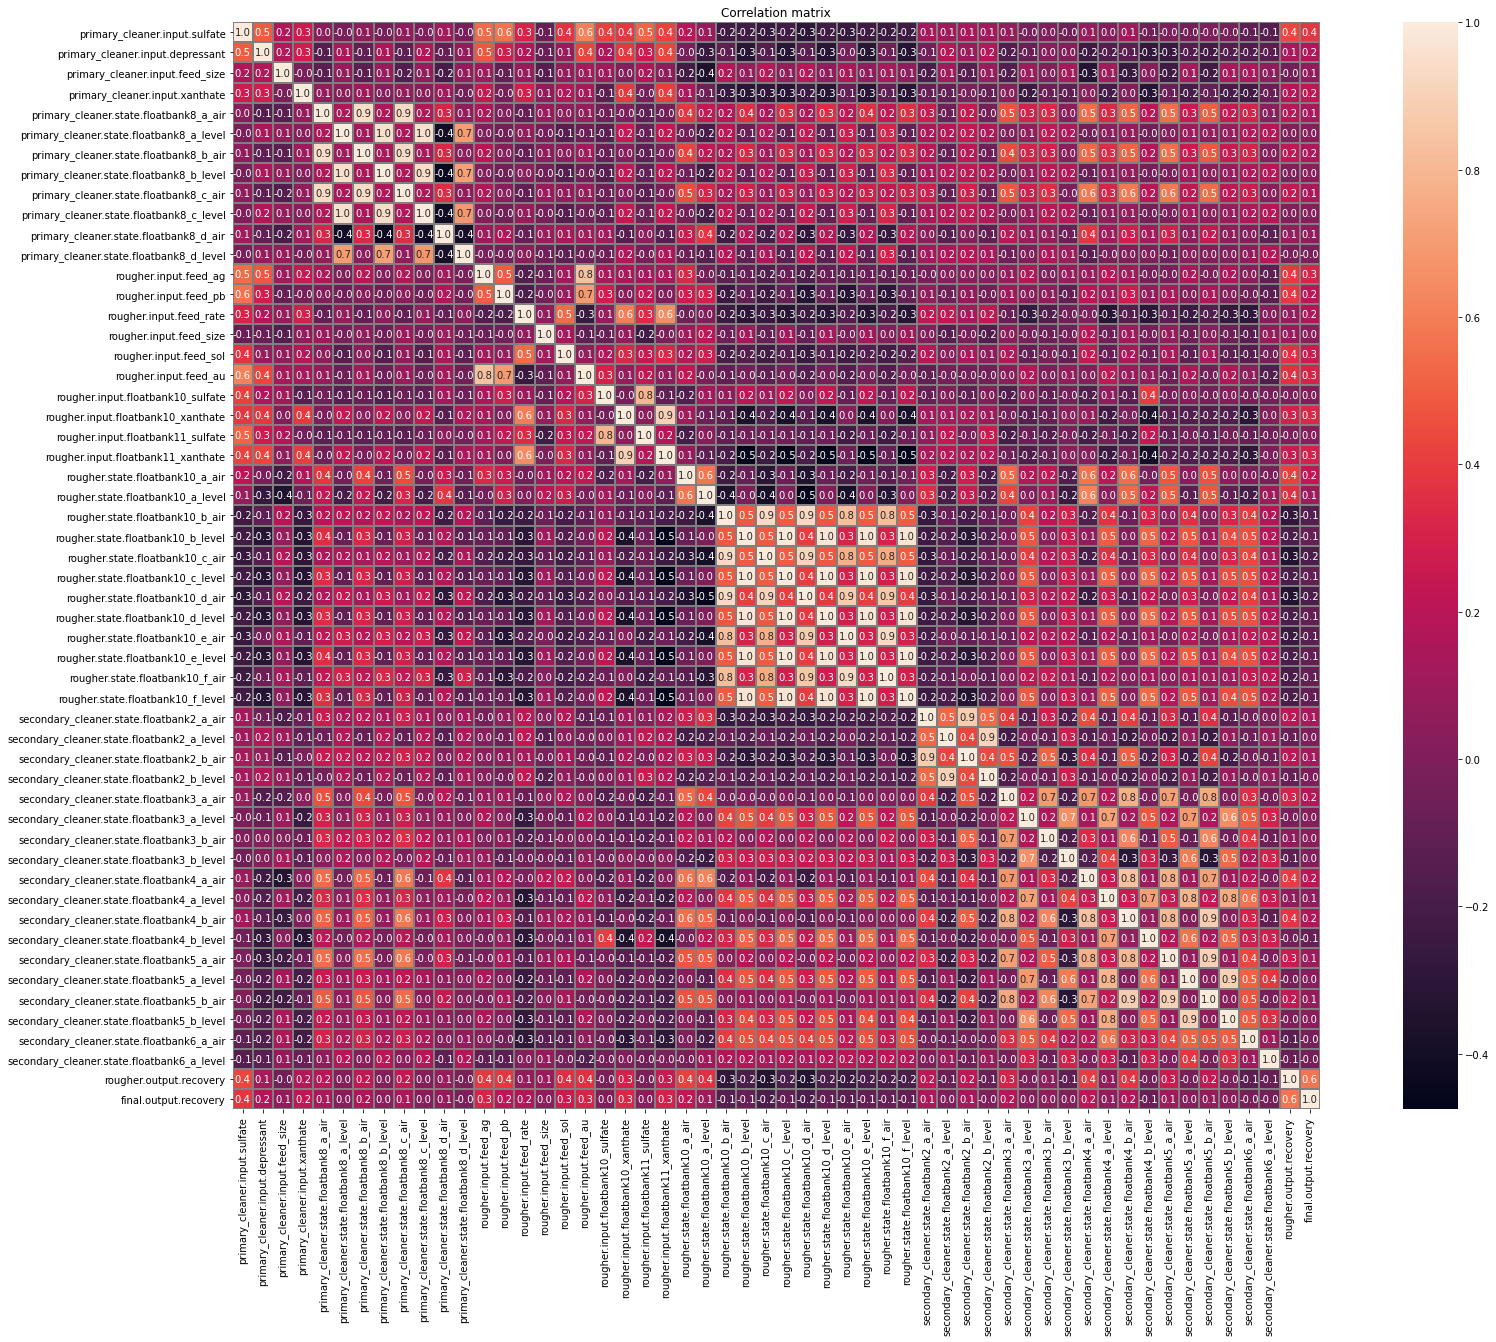

In [23]:
cm = train.corr()
plt.figure(figsize=(30, 20))
plt.title('Correlation matrix')
sns.heatmap(cm, annot=True, square=True, fmt='.1f', linewidths=1, linecolor='gray') 
plt.show()

`rougher.input.feed_au` и `rougher.input.feed_ag` are highly correlated with each other. Since the target attribute is the prediction of the gold volume, we can remove the same attribute for silver.

In [24]:
correlated_features_upd=['primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank5_b_level']
correlated_features_upd

['primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_

In [25]:
train=train.drop(correlated_features_upd, axis=1)
test=test.drop(correlated_features_upd, axis=1)

In [26]:
display(train.shape)
test.shape

(13852, 30)

(5290, 30)

To sum up: 
- out of the 87 columns of the training sample, only 30 are left, the rest are either missing from the test sample, or are too correlated with each other. We have the same columns in the test sample.

- lines with gaps and zeros in the target attributes are removed from the training and test sets.

- the gaps in the training features are filled with values from the previous rows.

## Data analysis

### Changes in the concentration of metals (Au, Ag, Pb) at different stages of cleaning

We have data on the concentration of metals at those stages: flotation, primary processing and final processing results. Let's look at their distribution depending on the processing stage.

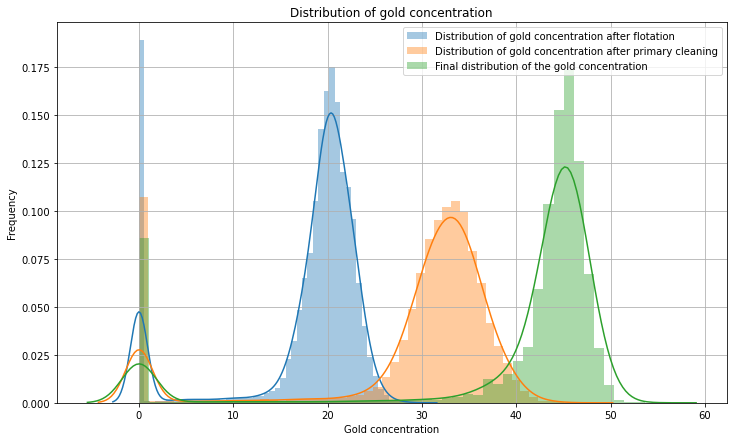

In [27]:
plt.figure(figsize=(12,7))
sns.distplot(full['rougher.output.concentrate_au'], label='Distribution of gold concentration after flotation')
sns.distplot(full['primary_cleaner.output.concentrate_au'], label='Distribution of gold concentration after primary cleaning')
sns.distplot(full['final.output.concentrate_au'], label='Final distribution of the gold concentration')
plt.title('Distribution of gold concentration')
plt.legend()
plt.xlabel('Gold concentration')
plt.ylabel('Frequency')
plt.grid()
plt.xlim
plt.show()

After flotation, the gold concentration is 20 units in the median, after the initial treatment it increases to 33, after the final treatment it reaches 45 units. There are outliers near zero.

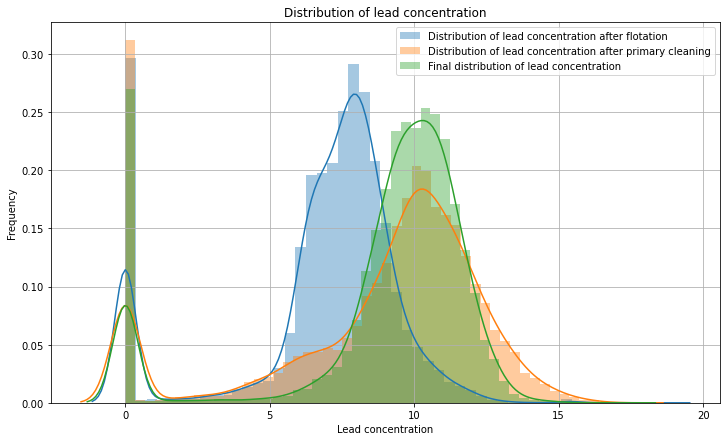

In [28]:
plt.figure(figsize=(12,7))
sns.distplot(full['rougher.output.concentrate_pb'], label='Distribution of lead concentration after flotation')
sns.distplot(full['primary_cleaner.output.concentrate_pb'], label='Distribution of lead concentration after primary cleaning')
sns.distplot(full['final.output.concentrate_pb'], label='Final distribution of lead concentration')
plt.title('Distribution of lead concentration')
plt.legend()
plt.xlabel('Lead concentration')
plt.ylabel('Frequency')
plt.grid()
plt.xlim
plt.show()

After flotation, the lead concentration is at a median of 7.5 units, after primary processing it increases to 10 and remains at the same level after final processing of raw materials. There are outliers near zero.

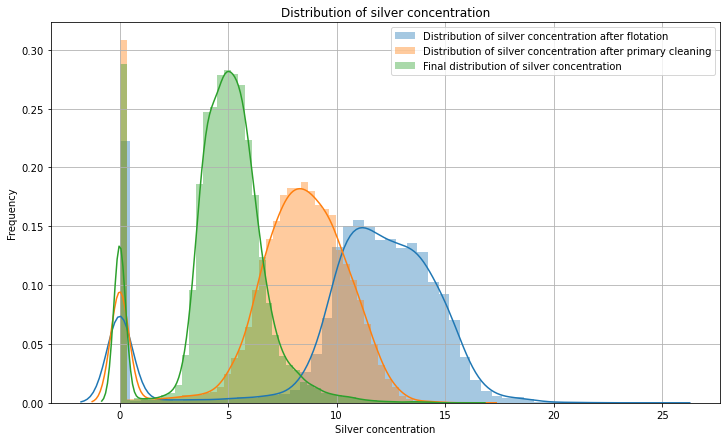

In [29]:
plt.figure(figsize=(12,7))
sns.distplot(full['rougher.output.concentrate_ag'], label='Distribution of silver concentration after flotation')
sns.distplot(full['primary_cleaner.output.concentrate_ag'], label='Distribution of silver concentration after primary cleaning')
sns.distplot(full['final.output.concentrate_ag'], label='Final distribution of silver concentration')
plt.title('Distribution of silver concentration')
plt.legend()
plt.xlabel('Silver concentration')
plt.ylabel('Frequency')
plt.grid()
plt.xlim
plt.show()

After flotation, the silver concentration is about 12 units in the median, after primary cleaning it drops to 8, and after filnal processing - to 5 units. There are outliers near zero.

### Distribution of raw material granule sizes on the training and test samples

Let's look at the size distributions of raw material granules on the training and test samples. If the distributions are very different from each other, the model estimate will be incorrect.

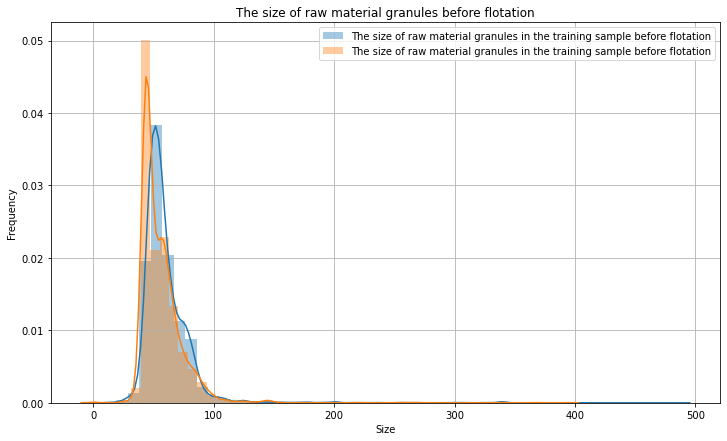

In [30]:
plt.figure(figsize=(12,7))
sns.distplot(train['rougher.input.feed_size'], label='The size of raw material granules in the training sample before flotation')
sns.distplot(test['rougher.input.feed_size'], label='The size of raw material granules in the training sample before flotation')
plt.title('The size of raw material granules before flotation')
plt.legend()
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid()
plt.xlim
plt.show()

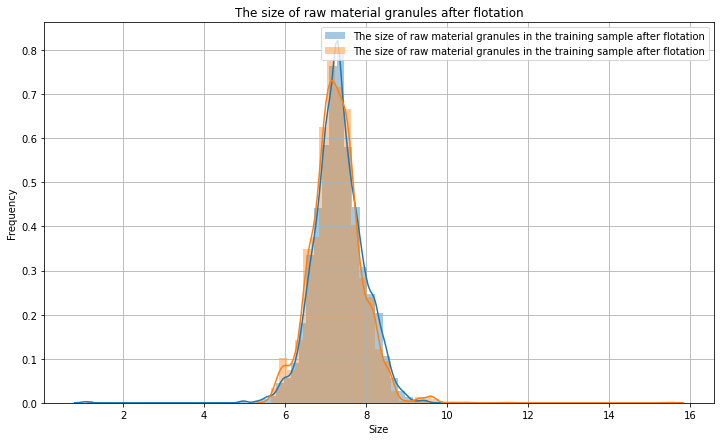

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(train['primary_cleaner.input.feed_size'], label='The size of raw material granules in the training sample after flotation')
sns.distplot(test['primary_cleaner.input.feed_size'], label='The size of raw material granules in the training sample after flotation')
plt.title('The size of raw material granules after flotation')
plt.legend()
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid()
plt.xlim
plt.show()

The distributions are not very different in the training and test sample.

### Total concentration of all substances at different stages: in raw materials, in rough and final concentrates

Let's look at the distribution of the total concentration of all substances at different stages.

Let's add the total values to the table with the full sample, since there is no necessary data in the training and test samples:

In [32]:
full['rougher.input.feed_sum']=full['rougher.input.feed_pb']+full['rougher.input.feed_ag']+full['rougher.input.feed_au']
full['rougher.output.concentrate_sum']= full['rougher.output.concentrate_ag']+full['rougher.output.concentrate_pb']+full['rougher.output.concentrate_au']
full['primary_cleaner.output.concentrate_sum']= full['primary_cleaner.output.concentrate_ag']+full['primary_cleaner.output.concentrate_pb']+full['primary_cleaner.output.concentrate_au']
full['final.output.concentrate_sum']= full['final.output.concentrate_ag']+full['final.output.concentrate_pb']+full['final.output.concentrate_au']

Let's visualize the distribution on all stages:

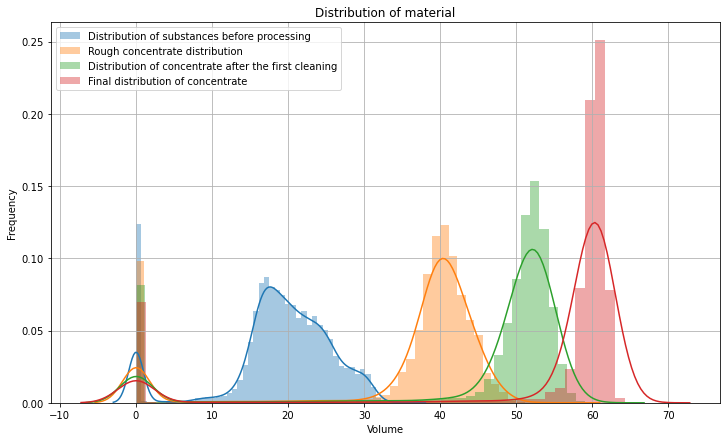

In [33]:
plt.figure(figsize=(12,7))
sns.distplot(full['rougher.input.feed_sum'], label='Distribution of substances before processing')
sns.distplot(full['rougher.output.concentrate_sum'], label='Rough concentrate distribution')
sns.distplot(full['primary_cleaner.output.concentrate_sum'], label='Distribution of concentrate after the first cleaning')
sns.distplot(full['final.output.concentrate_sum'], label='Final distribution of concentrate')
plt.title('Distribution of material')
plt.legend()
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid()
plt.xlim
plt.show()

We can see that there are anomalous values near zero. Let's look at the first percentiles.

In [34]:
len(full)

22716

In [35]:
display(np.percentile(full['rougher.input.feed_sum'], [10, 5, 1]))
display(np.percentile(full['rougher.output.concentrate_sum'], [10, 5, 1]))
display(np.percentile(full['primary_cleaner.output.concentrate_sum'], [10, 5, 1]))
display(np.percentile(full['final.output.concentrate_sum'], [10, 5, 1]))

array([10.04536164,  0.        ,  0.        ])

array([0.03, 0.  , 0.  ])

array([4.28566861, 0.        , 0.        ])

array([24.93106771,  0.        ,  0.        ])

Let's see how many percent of the rows contain zero concentrate values at any of the processing stages.

In [36]:
len(full[(full['final.output.concentrate_sum']==0)|(full['rougher.input.feed_sum']==0)|(full['primary_cleaner.output.concentrate_sum']==0)|(full['final.output.concentrate_sum']==0)])/len(full)

0.08870399718260256

9% of all data have zero values in concentrates. 

Let's look at the rows with zero values in the total concentrates.

In [37]:
full_null=full[(full['final.output.concentrate_sum']==0)|(full['rougher.input.feed_sum']==0)|(full['primary_cleaner.output.concentrate_sum']==0)|(full['final.output.concentrate_sum']==0)]
full_null=full_null.reset_index()
full_null.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
809,2016-11-01 14:59:59,0.0,0.0,0.0,0.0,30.614797,0.0,0.0,0.0,0.0,0.062581,0.050968,7.38,0.012621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.675153e+03,-500.272585,1.696304e+03,-499.884288,1.695187e+03,-500.531594,1.700012e+03,-500.126929,4.994285e+03,60.497419,-0.482753,2.081735,0.0,0.0,0.184423,20.590228,0.0,0.0,0.217810,0.018813,0.008428,0.001225,0.0,0.0,0.0,0.0,63.634801,5.550490,0.0,13.615173,1.589032,998.025757,-500.116848,1500.746155,-399.965184,1498.808110,-400.900852,1402.061948,-401.331359,1349.614824,-300.333140,1349.670817,-300.958478,0.0,0.0,0.0,0.0,32.045715,-500.078260,2.711123e+01,-500.256383,3.305482e+01,-500.189688,3.100309e+01,-500.119486,1.996921e+01,-501.150136,1.692849e+01,-500.369972,16.971103,-518.503154,14.043515,-331.633315,22.015250,-505.952618,0.0,0.0,0.0,0.0
1743,2018-01-06 23:59:59,0.0,0.0,0.0,0.0,58.620105,0.0,0.0,0.0,0.0,2.298983,0.001969,7.70,0.002274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609382e-16,-781.604340,6.195

We see that in a strange way there may be lines with zero total concentrate at a processing stage, while with adequate values in the final indicators. Perhaps, at some stages, there were simply no indicators, so they were filled with zeros. It makes sense to remove them from the samples for adequate model training.

In [38]:
display(len(train))
exclude_list=full_null['date'].to_list()
train=train.query('date not in @exclude_list')
display(len(train))

13852

13725

In [39]:
display(len(test))
test=test.query('date not in @exclude_list')
display(len(test))

5290

5218

We removed 130 rows from the training sample and 72 rows from the test sample.

## Model

### Function for calculating the total sMAPE

We will define functions for calculating quality metrics: sMAPE for forecasts at the stages of the rough and final concentrate, as well as the final metrics.

In [40]:
def smape(target, prediction):
    result = ((2* abs(target - prediction))/(abs(target)+abs(prediction)))*100
    mean = result.mean()
    return mean

In [41]:
def total_smape(rougher_target, rougher_prediction, final_target, final_prediction):
    final_smape= 0.25 * smape(rougher_target, rougher_prediction) + 0.75 * smape(final_target, final_prediction)
    return final_smape

### Searching for an optimal model

We will train different models and evaluate their quality by cross-validation. Then we'll choose the best model and test it on a test sample.
WE  need to predict two values at once:

    rougher.output.recovery concentrate enrichment efficiency;
    final.output.recovery concentrate enrichment efficiency   

First, let's look at the scale of the features.

No handles with labels found to put in legend.


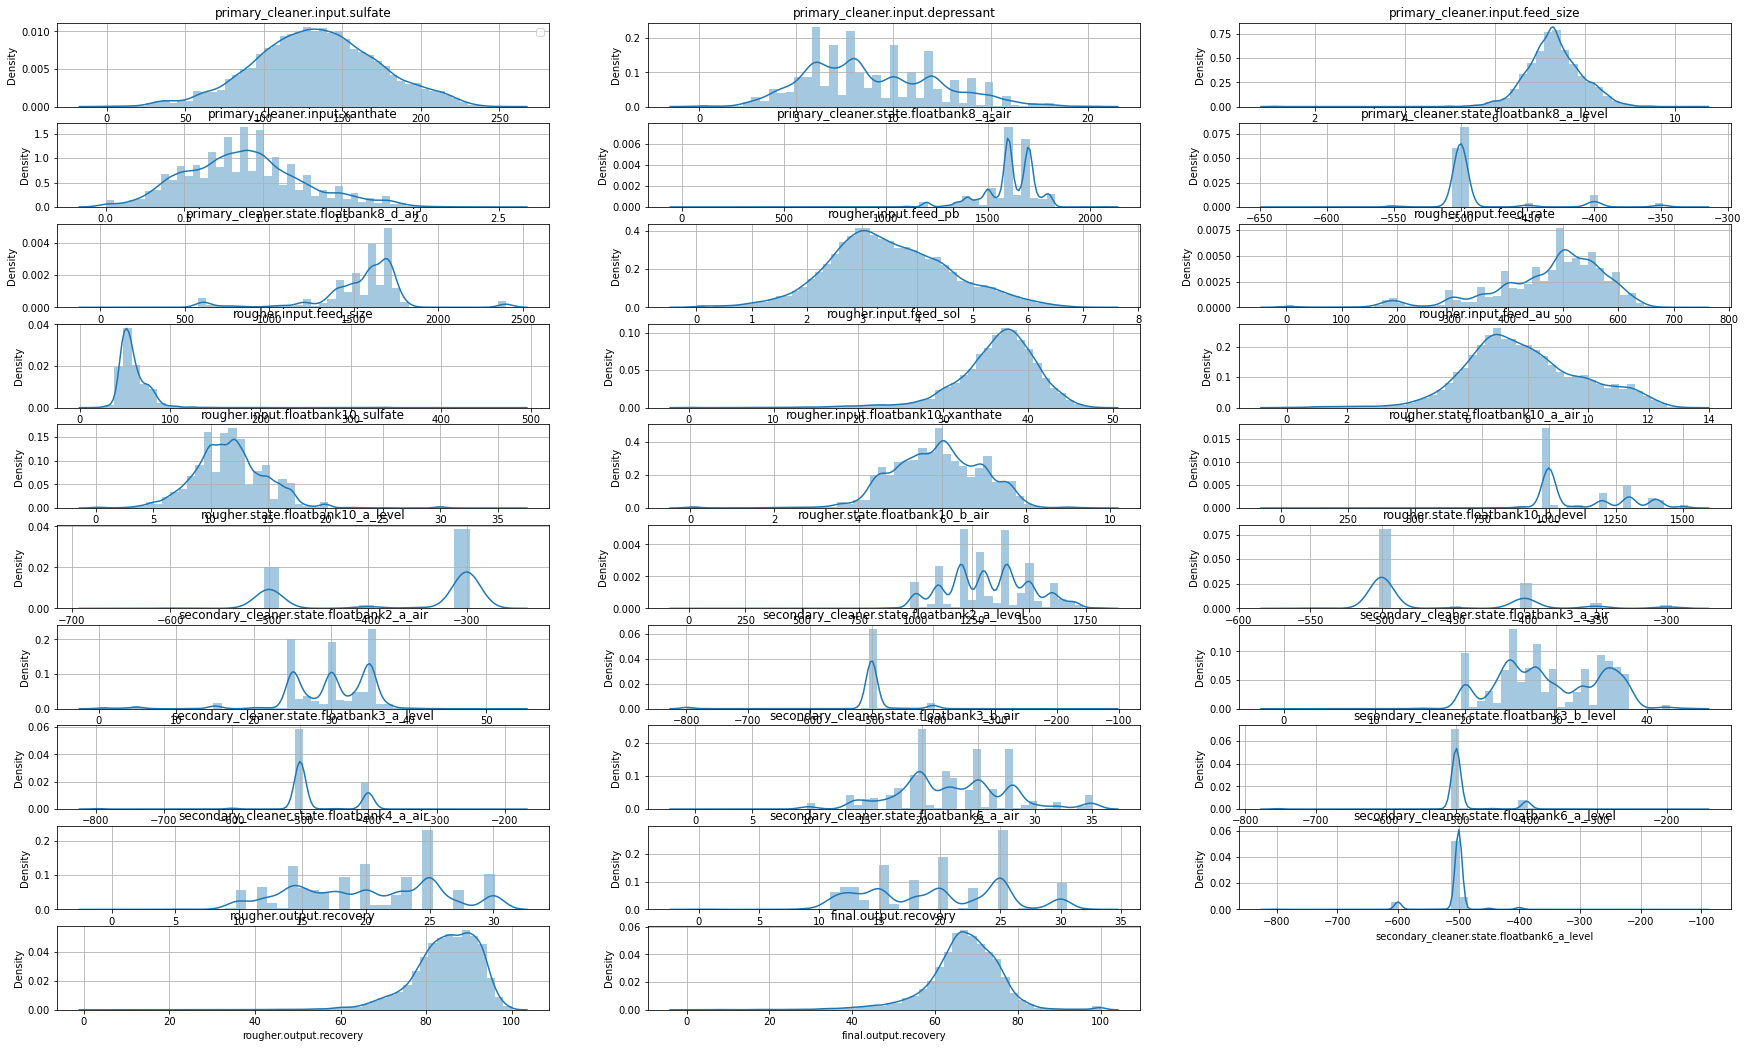

In [42]:
plt.subplots(figsize=(30,20))
num_cols=3
num_rows=len(train.columns.values)//num_cols + 1
for i, col in enumerate(train.drop(columns={'date'}).columns.values):
    sns.distplot(train[col], ax=plt.subplot(num_rows,num_cols, i+1))
    plt.title(col)
    plt.grid()
    if i ==0: plt.legend()

The scale of the features is different, it is worth standardizing them.

To train the model for determining the efficiency of the roughing concentrate `rougher.output.recovery`, we will remove the features from the later processing stages to avoid the leakage of the features.

In [43]:
train_r=train[['date', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level',
       'rougher.output.recovery']]
test_r=test[['date', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level',
       'rougher.output.recovery']]
test_r.head(1)

,date,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.output.recovery
0,2016-09-01 00:59:59,5.63671,489.793655,62.710452,42.02244,12.084103,16.922877,6.153479,1001.849317,-350.301265,1249.738612,-399.107531,89.993421


Let's set training and target features for two sets where we will predict `rougher.output.recovery` and `final.output.recovery`.

In [44]:
# rough train 
target_train_r=train_r['rougher.output.recovery']
features_train_r=train_r.drop(['rougher.output.recovery','date'], axis=1)

# final train 
target_train_f=train['final.output.recovery']
features_train_f=train.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)

# rough test
target_test_r=test_r['rougher.output.recovery']
features_test_r=test_r.drop(['rougher.output.recovery','date'], axis=1)

#final test 
target_test_f=test['final.output.recovery']
features_test_f=test.drop(['rougher.output.recovery','final.output.recovery','date'], axis=1)

We bring the features to a single scale.

In [45]:
# rough scaled train and test features 
r_scaler = StandardScaler()
r_scaler.fit(features_train_r)
features_train_r_scaled=r_scaler.transform(features_train_r)
features_test_r_scaled=r_scaler.transform(features_test_r)

# final scaled train and test features
f_scaler = StandardScaler()
f_scaler.fit(features_train_f)
features_train_f_scaled=f_scaler.transform(features_train_f)
features_test_f_scaled=f_scaler.transform(features_test_f)

Let's take three models for comparison
1. DecisionTreeRegressor
1. RandomForestRegressor
1. LinearRegression

Let's check the results using cross-validation, and the metric will be our sMAPE score.

We will set the models for training and select the optimal hyper-parameters.

#### Decision Tree Regressor

Let's see the quality of the tree model predictions for predicting the volume of gold in the rough and final concentrate.

In [46]:
%%time
best_model_tree = None
best_result_tree_r = -100
best_depth_tree = 0
for depth in range(1,6):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    smape_score=abs(cross_val_score(model,features_train_r_scaled,target_train_r, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False))
                 .mean())
    if smape_score > best_result_tree_r:
        best_model_tree = model
        best_result_tree_r = smape_score.round(2)
        best_depth_tree = depth
print("sMAPE score of rough concentrate predictions for the tree model:", 
      best_result_tree_r, "Tree depth:", best_depth_tree)

sMAPE score of rough concentrate predictions for the tree model: 7.63 Tree depth: 1
Wall time: 1.5 s


With a tree model with a depth of 3 nodes, we managed to achieve the result of sMAPE **7.63** to predict the volume of gold in the rough concentrate.

Let's see the result on the full sample for the final predictions.

In [47]:
%%time
best_model_tree = None
best_result_tree_f = 100
best_depth_tree = 0
for depth in range(1,6):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    smape_score=abs(cross_val_score(model,features_train_f_scaled,target_train_f, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False))
                 .mean())
    if smape_score < best_result_tree_f:
        best_model_tree = model
        best_result_tree_f = smape_score.round(2)
        best_depth_tree = depth
print("sMAPE score of final concentrate predictions for the tree model:", best_result_tree_f, "Tree depth", best_depth_tree)

sMAPE score of final concentrate predictions for the tree model: 10.11 Tree depth 1
Wall time: 4.43 s


With a tree model with a depth of 1 node, it was possible to achieve the result of sMAPE 10.11 for predicting the volume of gold in the final concentrate.

#### Random Forest Regressor

In [48]:
%%time
best_model_f = None
best_result_forest_r = 100
best_est = 0
best_depth = 0
for est in range(10, 50, 5):
    for depth in range (1, 10, 1):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        smape_score=abs(cross_val_score(model,features_train_r_scaled,target_train_r, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False)).mean())
        if smape_score < best_result_forest_r:
            best_model = model 
            best_result_forest_r = smape_score.round(2)
            best_est = est
            best_depth = depth
            
print("sMAPE score of the best random forest model for predictions gold volume in the rough concentrate:", 
      best_result_forest_r, "Tree count:", best_est, "Max depth:", depth)

sMAPE score of the best random forest model for predictions gold volume in the rough concentrate: 7.04 Tree count: 35 Max depth: 9
Wall time: 8min 31s


The random forest model managed to achieve the result of sMAPE score 7.04 for predicting the volume of gold in the rough concentrate. Tree count: 35 Max depth: 9.

In [49]:
%%time
best_model = None
best_result_forest_f = 100
best_est = 0
best_depth = 0
for est in range(10, 50, 5):
    for depth in range (1, 10, 1):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        smape_score=abs(cross_val_score(model,features_train_f_scaled,target_train_f, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False))
                 .mean())
        if smape_score < best_result_forest_f:
            best_model = model 
            best_result_forest_f = smape_score.round(2)
            best_est = est
            best_depth = depth
            
print("sMAPE score of the best random forest model for predictions gold volume in the final concentrate:", 
      best_result_forest_f, "Tree count:", best_est, "max depth:", depth)

sMAPE score of the best random forest model for predictions gold volume in the final concentrate: 9.7 Tree count: 25 max depth: 9
Wall time: 19min 24s


The random forest model managed to achieve the sMAPE score result **9.70** to predict the volume of gold in the final concentrate. Tree count: 25 max depth: 9.

#### Linear Regression

In [50]:
%%time
linear_for_r = LinearRegression()
linear_for_r_smape_score=abs(cross_val_score(linear_for_r,features_train_r_scaled,target_train_r, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False))
                 .mean())
print("sMAPE score of linear regression for rough concentrate predictions", linear_for_r_smape_score)

sMAPE score of linear regression for rough concentrate predictions 6.226389642466098
Wall time: 124 ms


Using the linear regression algorithm, we obtained the sMAPE score **6.22** to predict the volume of gold in the rough concentrate.

In [51]:
%%time
linear_for_f = LinearRegression()
linear_for_f_smape_score=abs(cross_val_score(linear_for_f,features_train_f_scaled,target_train_f, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better = False))
                 .mean())
print("sMAPE score of linear regression for final concentrate predictions", linear_for_f_smape_score)

sMAPE score of linear regression for final concentrate predictions 9.914567958898946
Wall time: 145 ms


Using the linear regression algorithm, we obtained the sMAPE score **9.91** to predict the volume of gold in the final concentrate.

To sum up:

  - results of models for predictions in **rough** concentrate:
     - Decistion Tree 7.13
     - Random Forest 7.04
     - **Lineal regression 6.22**
  - results of models for predictions in the **final** concentrate:
      - Decistion Tree 10.11
      - **Random Forest 9.70**
      - Lineal regression 9.91

So, to predict the volume of gold, we should take the following models
- **for rough concentrate: linear regression**
- **for the final concentrate: Random Forest, Number of trees: 25, Maximum depth: 9**

Let's see the final sMAPE

In [52]:
# final smape for train 
total_smape_train=0.25*best_result_forest_r + 0.75*best_result_forest_f
total_smape_train

9.035

**The final smape on the training sample is ~9.04.**

### Testing optimal models on the test sample

Let's use optimal models for forecasts on the test sample.

Модель для прогноза в черновом концентрате: 

In [53]:
# rough
lr_model = LinearRegression()
lr_model.fit(features_train_r_scaled,target_train_r) 
lr_predictions = lr_model.predict(features_test_r_scaled)
rough_smape = smape(target_test_r, lr_predictions)
print('Indicator of the efficiency of rough concentrate enrichment: {:.2f}, sMAPE: {:.2f}'.format(lr_predictions.mean(),rough_smape))

Indicator of the efficiency of rough concentrate enrichment: 86.34, sMAPE: 7.89


Earlier, we calculated the efficiency of enrichment using the formula on the training sample: 82.4. In the test set, the forecast was slightly higher - 86.34. sMAPE is worse than in the training sample - 7.89 compared to 6.22.

Model for forecasting in the final concentrate:

In [54]:
# final
rf_model_f = RandomForestRegressor(random_state=12345, n_estimators=25, max_depth=9)
rf_model_f.fit(features_train_f_scaled,target_train_f) 
rf_predictions_f = rf_model_f.predict(features_test_f_scaled)
rough_smape_f = smape(target_test_f, rf_predictions_f)
print('Indicator of the efficiency of final concentrate enrichment: {:.2f}, sMAPE: {:.2f}'.format(rf_predictions_f.mean(),rough_smape_f))

Indicator of the efficiency of final concentrate enrichment: 67.67, sMAPE: 7.73


The final concentrate enrichment efficiency index: 67.67, sMAPE: 7.73. sMAPE on the training sample was 9.70.

Let's calculate the final sMAPE for the models in the test sample.

In [55]:
# final smape for test 
total_smape = (0.25*rough_smape + 0.75*rough_smape_f)
total_smape

7.773805506588691

**The final sMAPE for the models in the test sample is 7.77**.

Let's compare the result with a dummy model one. 

In [56]:
# comparison with dummy model
dummy_r = DummyRegressor(strategy='median')
dummy_f = DummyRegressor(strategy='median')
dummy_r.fit(features_train_r_scaled,target_train_r)
dummy_f.fit(features_train_f_scaled,target_train_f)
dummy_predict_r = dummy_r.predict(features_test_r_scaled)
dummy_predict_f = dummy_f.predict(features_test_f_scaled)
dummy_final = (0.25*smape(target_test_r, dummy_predict_r) + 0.75* smape(target_test_f, dummy_predict_f))
dummy_final

8.320193518677506

sMAPE score of a dummy model is 8.32, so we made sure that our model is better than the dummy one.

## Summary

Data preparation: 
- out of the 87 columns of the training sample, only 30 are left, the rest are either missing from the test sample, or are too correlated with each other. We have the same columns in the test sample.
- lines with gaps and zeros in the target attributes are removed from the training and test sets.
- the gaps in the training features are filled with values from the previous rows.
- lines with nulls in concentrate features are also removed. 

Model: 

- Random forest model (number of trees: 30, maximum depth: 9) should be used to predict the efficiency of rough concentrate enrichment,  
- Linear regression should be used for prediction at the final stage. 

With these parameters, it is possible to achieve the final quality metric sMAPE 7.77.